# BundesLiga Analysis

### Objectives:-



#### To find on which age group the club has spend more money.


#### To find top 10 expensive players bought by the clubs.

#### To find top 10 less expensive players bought by the clubs.

#### To find clubs with highest spendings

### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Reading the dataset from the directory

In [2]:
df = pd.read_csv('bndliga.csv')
df

,Unnamed: 0,name,full_name,age,height,nationality,place_of_birth,price,max_price,position,shirt_nr,foot,club,contract_expires,joined_club,player_agent,outfitter
0,0,Manuel Neuer,Manuel Peter Neuer,37,1.93,Germany,Gelsenkirchen,7.00,45.0,Goalkeeper,1,right,Bayern Munich,2024-06-30,2011-07-01,PRO Profil GmbH,adidas
1,1,Yann Sommer,NaN,34,1.83,Switzerland,Morges,5.00,13.0,Goalkeeper,27,right,Bayern Munich,2025-06-30,2023-01-19,Relatives,Puma
2,2,Sven Ulreich,NaN,34,1.92,Germany,Schorndorf,0.90,6.0,Goalkeeper,26,right,Bayern Munich,2024-06-30,2021-07-01,BMS Sportconsulting ...,adidas
3,3,Johannes Schenk,NaN,20,1.91,Germany,Schweinfurt,0.30,0.3,Goalkeeper,35,NaN,Bayern Munich,2024-06-30,2022-07-01,11WINS,NaN
4,4,Matthijs de Ligt,NaN,23,1.89,Netherlands,Leiderdorp,75.00,75.0,Defender - Centre-Back,4,right,Bayern Munich,2027-06-30,2022-07-19,Rafaela Pimenta,adidas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,510,Takuma Asano,浅野 拓磨,28,1.73,Japan,"Komono, Mie",4.00,4.0,Attack - Right Winger,11,right,VfL Bochum,2024-06-30,2021-07-01,JEB ENTERTAINMENT ...,adidas
511,511,Philipp Hofmann,NaN,30,1.95,Germany,Arnsberg,2.50,2.5,Attack - Centre-Forward,33,left,VfL Bochum,2024-06-30,2022-07-01,ROOF,NaN
512,512,Simon Zoller,Simon Martin Zoller,31,1.79,Germany,Friedrichshafen,1.10,3.0,Attack - Centre-Forward,9,right,VfL Bochum,2024-06-30,2019-01-01,GoalSky,Puma
513,513,Silvère Ganvoula,Silvère Ganvoula M'boussy,26,1.91,Congo,Brazzaville,0.75,2.5,Attack - Centre-Forward,35,right,VfL Bochum,2023-06-30,2019-07-05,BY Sport Consulting,Puma


### Fetching shape of the dataset 

In [3]:
df.shape


(515, 17)

### First 10 records from the dataset

In [4]:
df.head(10)


,Unnamed: 0,name,full_name,age,height,nationality,place_of_birth,price,max_price,position,shirt_nr,foot,club,contract_expires,joined_club,player_agent,outfitter
0,0,Manuel Neuer,Manuel Peter Neuer,37,1.93,Germany,Gelsenkirchen,7.0,45.0,Goalkeeper,1,right,Bayern Munich,2024-06-30,2011-07-01,PRO Profil GmbH,adidas
1,1,Yann Sommer,NaN,34,1.83,Switzerland,Morges,5.0,13.0,Goalkeeper,27,right,Bayern Munich,2025-06-30,2023-01-19,Relatives,Puma
2,2,Sven Ulreich,NaN,34,1.92,Germany,Schorndorf,0.9,6.0,Goalkeeper,26,right,Bayern Munich,2024-06-30,2021-07-01,BMS Sportconsulting ...,adidas
3,3,Johannes Schenk,NaN,20,1.91,Germany,Schweinfurt,0.3,0.3,Goalkeeper,35,NaN,Bayern Munich,2024-06-30,2022-07-01,11WINS,NaN
4,4,Matthijs de Ligt,NaN,23,1.89,Netherlands,Leiderdorp,75.0,75.0,Defender - Centre-Back,4,right,Bayern Munich,2027-06-30,2022-07-19,Rafaela Pimenta,adidas
5,5,Dayot Upamecano,Dayotchanculle Oswald Upamecano,24,1.86,France Guinea-Bissau,Évreux,60.0,60.0,Defender - Centre-Back,2,right,Bayern Munich,2026-06-30,2021-07-05,Unique Sports Group,Nike
6,6,Lucas Hernández,Lucas François Bernard Hernández Pi,27,1.84,France Spain,Marseille,50.0,70.0,Defender - Centre-Back,21,left,Bayern Munich,2024-06-30,2019-07-01,Manuel García ...,Nike
7,7,Alphonso Davies,Alphonso Boyle Davies,22,1.85,Canada Liberia,Buduburam,70.0,80.0,Defender - Left-Back,19,left,Bayern Munich,2025-06-30,2019-01-01,ATG Sports,NaN
8,8,Daley Blind,NaN,33,1.80,Netherlands,Amsterdam,6.0,25.0,Defender - Left-Back,23,left,Bayern Munich,2023-06-30,2023-01-05,SEG,adidas
9,9,João Cancelo,João Pedro Cavaco Cancelo,28,1.82,Portugal,Barreiro,60.0,70.0,Defender - Right-Back,22,right,Bayern Munich,2023-06-30,2023-01-31,Gestifute,Nike


### Information on dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        515 non-null    int64  
 1   name              515 non-null    object 
 2   full_name         229 non-null    object 
 3   age               515 non-null    int64  
 4   height            515 non-null    float64
 5   nationality       515 non-null    object 
 6   place_of_birth    510 non-null    object 
 7   price             510 non-null    float64
 8   max_price         510 non-null    float64
 9   position          515 non-null    object 
 10  shirt_nr          515 non-null    int64  
 11  foot              506 non-null    object 
 12  club              515 non-null    object 
 13  contract_expires  481 non-null    object 
 14  joined_club       515 non-null    object 
 15  player_agent      488 non-null    object 
 16  outfitter         193 non-null    object 
dt

### Data cleaning

#### Removing the unnecessary data from the data

In [6]:
df.drop(['Unnamed: 0','full_name','place_of_birth','foot','contract_expires','shirt_nr','joined_club','price','player_agent','outfitter'],axis=1,inplace=True)
df

,name,age,height,nationality,max_price,position,club
0,Manuel Neuer,37,1.93,Germany,45.0,Goalkeeper,Bayern Munich
1,Yann Sommer,34,1.83,Switzerland,13.0,Goalkeeper,Bayern Munich
2,Sven Ulreich,34,1.92,Germany,6.0,Goalkeeper,Bayern Munich
3,Johannes Schenk,20,1.91,Germany,0.3,Goalkeeper,Bayern Munich
4,Matthijs de Ligt,23,1.89,Netherlands,75.0,Defender - Centre-Back,Bayern Munich
...,...,...,...,...,...,...,...
510,Takuma Asano,28,1.73,Japan,4.0,Attack - Right Winger,VfL Bochum
511,Philipp Hofmann,30,1.95,Germany,2.5,Attack - Centre-Forward,VfL Bochum
512,Simon Zoller,31,1.79,Germany,3.0,Attack - Centre-Forward,VfL Bochum
513,Silvère Ganvoula,26,1.91,Congo,2.5,Attack - Centre-Forward,VfL Bochum


#### Renaming columns

In [7]:
df.rename(columns = {'name' : 'player_name','max_price' : 'price'},inplace=True)
df

,player_name,age,height,nationality,price,position,club
0,Manuel Neuer,37,1.93,Germany,45.0,Goalkeeper,Bayern Munich
1,Yann Sommer,34,1.83,Switzerland,13.0,Goalkeeper,Bayern Munich
2,Sven Ulreich,34,1.92,Germany,6.0,Goalkeeper,Bayern Munich
3,Johannes Schenk,20,1.91,Germany,0.3,Goalkeeper,Bayern Munich
4,Matthijs de Ligt,23,1.89,Netherlands,75.0,Defender - Centre-Back,Bayern Munich
...,...,...,...,...,...,...,...
510,Takuma Asano,28,1.73,Japan,4.0,Attack - Right Winger,VfL Bochum
511,Philipp Hofmann,30,1.95,Germany,2.5,Attack - Centre-Forward,VfL Bochum
512,Simon Zoller,31,1.79,Germany,3.0,Attack - Centre-Forward,VfL Bochum
513,Silvère Ganvoula,26,1.91,Congo,2.5,Attack - Centre-Forward,VfL Bochum


#### Described data after cleaning

In [8]:
df.describe()

,age,height,price
count,515.000000,515.000000,510.000000
mean,25.683495,1.847612,13.513627
std,4.700238,0.060996,18.659222
min,17.000000,1.680000,0.100000
25%,22.000000,1.800000,2.500000
50%,25.000000,1.850000,7.000000
75%,29.000000,1.890000,16.750000
max,39.000000,2.000000,150.000000


#### Describing specific columns

In [9]:
df[['age','height','price']].describe()

,age,height,price
count,515.000000,515.000000,510.000000
mean,25.683495,1.847612,13.513627
std,4.700238,0.060996,18.659222
min,17.000000,1.680000,0.100000
25%,22.000000,1.800000,2.500000
50%,25.000000,1.850000,7.000000
75%,29.000000,1.890000,16.750000
max,39.000000,2.000000,150.000000


#### Cleaned dataset

In [10]:
df

,player_name,age,height,nationality,price,position,club
0,Manuel Neuer,37,1.93,Germany,45.0,Goalkeeper,Bayern Munich
1,Yann Sommer,34,1.83,Switzerland,13.0,Goalkeeper,Bayern Munich
2,Sven Ulreich,34,1.92,Germany,6.0,Goalkeeper,Bayern Munich
3,Johannes Schenk,20,1.91,Germany,0.3,Goalkeeper,Bayern Munich
4,Matthijs de Ligt,23,1.89,Netherlands,75.0,Defender - Centre-Back,Bayern Munich
...,...,...,...,...,...,...,...
510,Takuma Asano,28,1.73,Japan,4.0,Attack - Right Winger,VfL Bochum
511,Philipp Hofmann,30,1.95,Germany,2.5,Attack - Centre-Forward,VfL Bochum
512,Simon Zoller,31,1.79,Germany,3.0,Attack - Centre-Forward,VfL Bochum
513,Silvère Ganvoula,26,1.91,Congo,2.5,Attack - Centre-Forward,VfL Bochum


### Exploratory Data Analysis

#### Fetching age to price disttribution

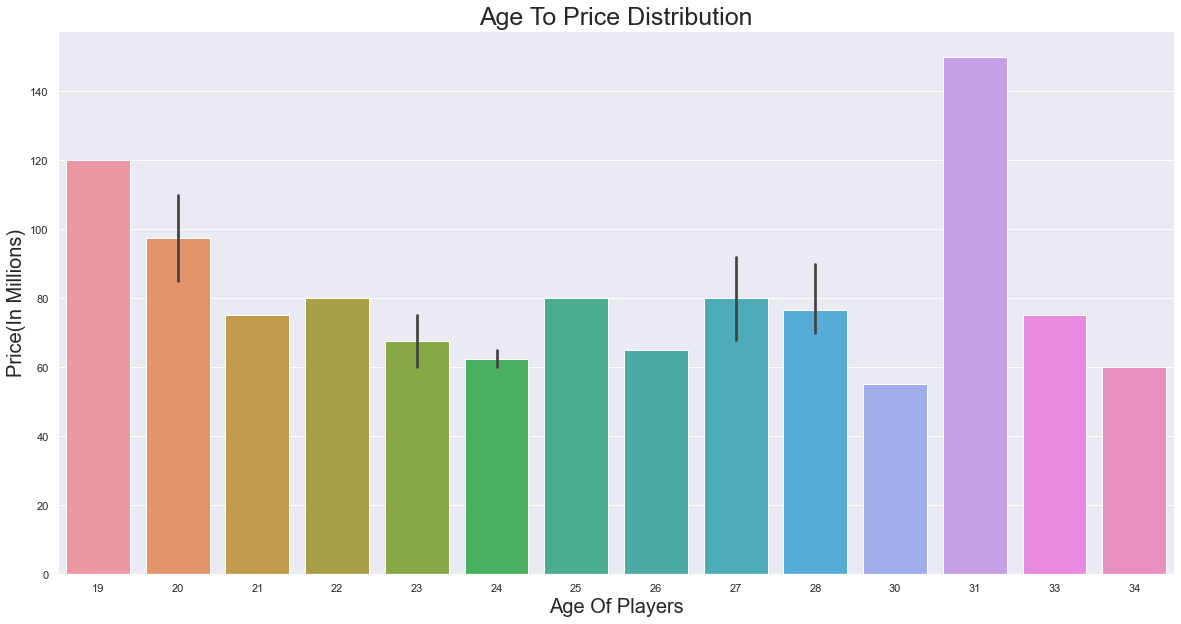

In [11]:
df1=df[df['price']>50].head(500)
sns.set(rc={'figure.figsize':(20,10)})
sns.barplot(data = df1, x = 'age', y= 'price')

plt.title('Age To Price Distribution',fontsize=25)
plt.xlabel('Age Of Players',fontsize=20)
plt.ylabel('Price(In Millions)',fontsize=20)
plt.show()


#### Objective 1 - To find on which age group the club has spend more money.

#### From present bar chart we can conclude that the age group between 19-34 is favourable by the clubs in which age 19 and 31 having the more preferences.  

#### Picking top 10 expensive players

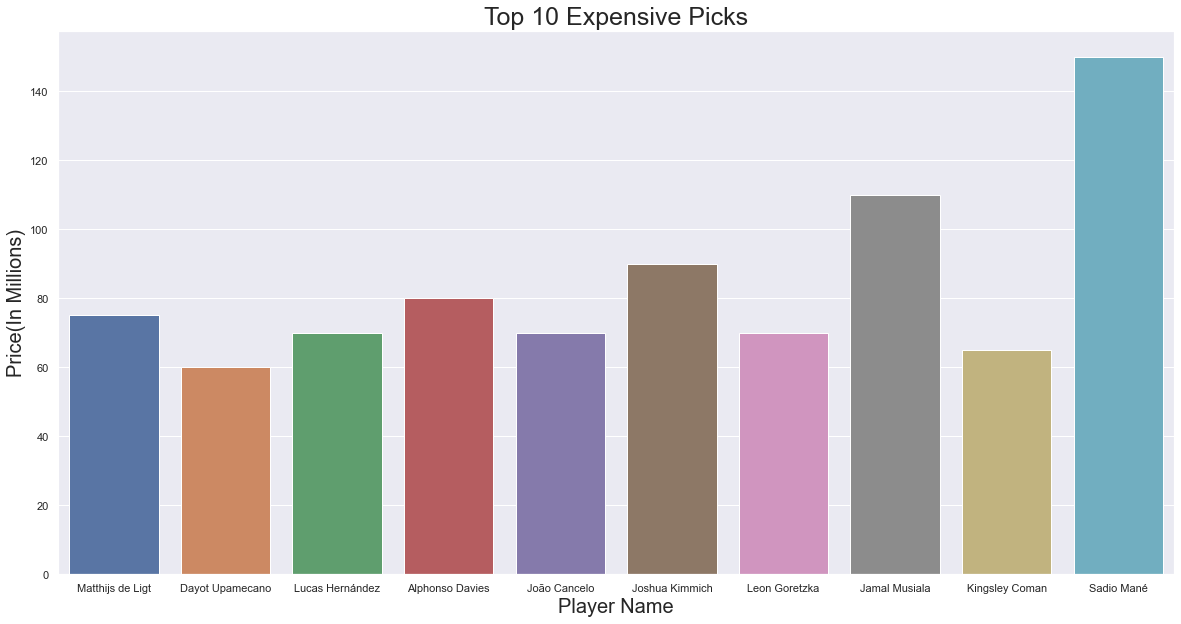

In [12]:
df2=df[df['price']>50].head(10)
sns.set(rc={'figure.figsize':(20,10)})
sns.barplot(data = df2, x = 'player_name', y= 'price')

plt.title('Top 10 Expensive Picks',fontsize=25)
plt.xlabel('Player Name',fontsize=20)
plt.ylabel('Price(In Millions)',fontsize=20)
plt.show()


#### Objective 2 -To find top 10 expensive players bought by the clubs. To find top 10 less expensive players bought by the clubs.

#### Among the top 10 players sold out for clubs, player named "Sadio Mane" has hit on top of the expensive players.

#### Top 10 less expensive players

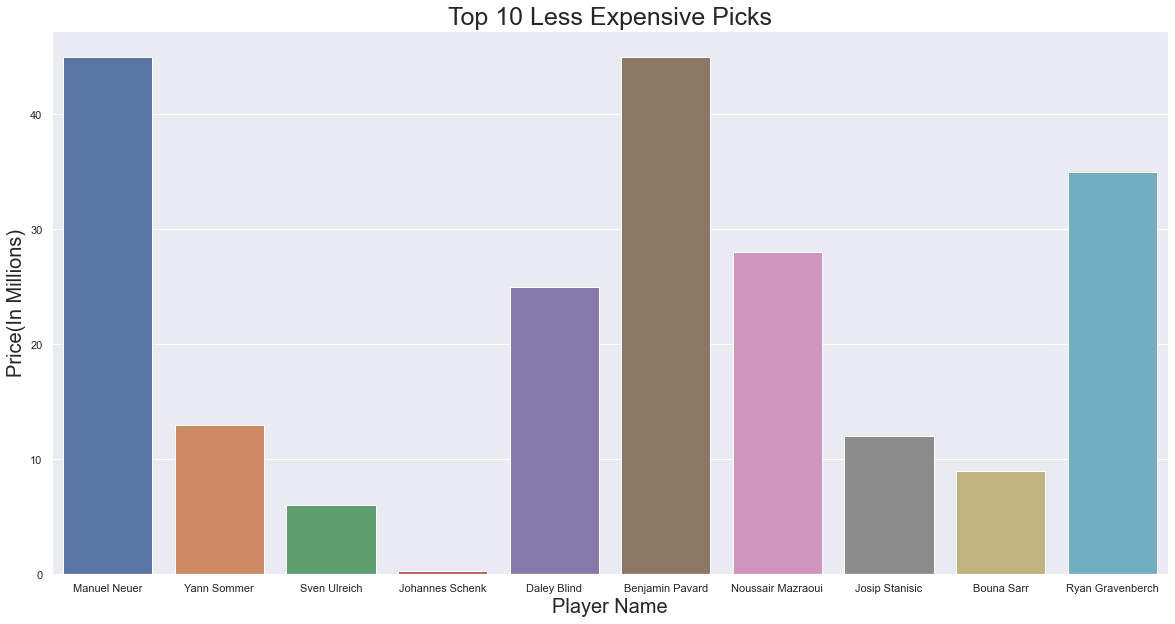

In [13]:
df2=df[df['price']<50].head(10)
sns.set(rc={'figure.figsize':(20,10)})
sns.barplot(data = df2, x = 'player_name', y= 'price')

plt.title('Top 10 Less Expensive Picks',fontsize=25)
plt.xlabel('Player Name',fontsize=20)
plt.ylabel('Price(In Millions)',fontsize=20)
plt.show()


#### Objective 3 - To find top 10 less expensive players bought by the clubs.

#### Among the top 10 less expensive players sold out for clubs, player named "Johannes Schenk" is the less expensive players.

#### Clubs with highest spendings

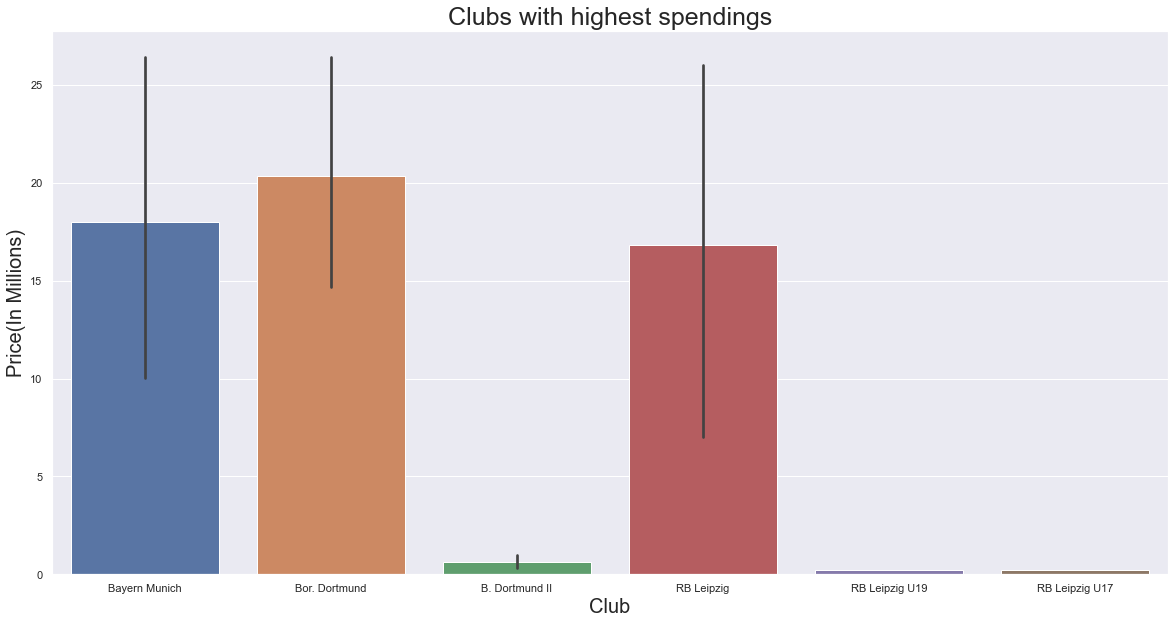

In [14]:
df2=df[df['price']<50].head(50)
sns.set(rc={'figure.figsize':(20,10)})
sns.barplot(data = df2, x = 'club', y= 'price')

plt.title('Clubs with highest spendings',fontsize=25)
plt.xlabel('Club',fontsize=20)
plt.ylabel('Price(In Millions)',fontsize=20)
plt.show()

#### Objective 4 - To find clubs with highest spendings

#### Respect to the clubs with more spendings on their players, "Borussia Dortmund" is the highest spnding club in BundesLiga followed by "Bayern Munich" and "RB Leipzig".